In [56]:
import glob
import numpy as np
import scipy.io as scio
from brainspace.datasets import load_parcellation, load_conte69
from brainspace.gradient import GradientMaps
from brainspace.plotting import plot_hemispheres
from brainspace.utils.parcellation import map_to_labels
from scipy.io import savemat
import matplotlib.pyplot as plt

In [57]:
path = '/Volumes/QCI/NormativeModel/Results/Result_GrayVol246_HBR_HCMDD_1228/StaResults/Gradient/subtype2_246FC/sub-*'

dataList = glob.glob(path)
print(dataList)
databox = []
box = np.zeros([246, 246])

['/Volumes/QCI/NormativeModel/Results/Result_GrayVol246_HBR_HCMDD_1228/StaResults/Gradient/subtype2_246FC/sub-1000002V01_FC.mat', '/Volumes/QCI/NormativeModel/Results/Result_GrayVol246_HBR_HCMDD_1228/StaResults/Gradient/subtype2_246FC/sub-1000003V01_FC.mat', '/Volumes/QCI/NormativeModel/Results/Result_GrayVol246_HBR_HCMDD_1228/StaResults/Gradient/subtype2_246FC/sub-1000012V01_FC.mat', '/Volumes/QCI/NormativeModel/Results/Result_GrayVol246_HBR_HCMDD_1228/StaResults/Gradient/subtype2_246FC/sub-1000024V01_FC.mat', '/Volumes/QCI/NormativeModel/Results/Result_GrayVol246_HBR_HCMDD_1228/StaResults/Gradient/subtype2_246FC/sub-1000052V01_FC.mat', '/Volumes/QCI/NormativeModel/Results/Result_GrayVol246_HBR_HCMDD_1228/StaResults/Gradient/subtype2_246FC/sub-1000053V01_FC.mat', '/Volumes/QCI/NormativeModel/Results/Result_GrayVol246_HBR_HCMDD_1228/StaResults/Gradient/subtype2_246FC/sub-1000060V01_FC.mat', '/Volumes/QCI/NormativeModel/Results/Result_GrayVol246_HBR_HCMDD_1228/StaResults/Gradient/subtyp

In [62]:
for i in dataList:
    data = scio.loadmat(i)['data']
    fizFC = np.arctanh(data)
    box = np.add(box, fizFC)

mfizFC = box / len(dataList)
mFC = np.tanh(mfizFC)


/var/folders/dh/dmftg40j21j249nqf2z5v2nh0000gn/T/ipykernel_41884/3110954185.py:3: RuntimeWarning: divide by zero encountered in arctanh
  fizFC = np.arctanh(data)


[[         inf 293.56003255 106.44370591 ...  51.49748764  84.43588005
   56.34230751]
 [293.56003255          inf -36.0951099  ... 101.05914522  99.36361524
  123.98194755]
 [106.44370591 -36.0951099           inf ...  47.90767596  24.99061599
  -11.53588745]
 ...
 [ 51.49748764 101.05914522  47.90767596 ...          inf 190.11304883
  300.21266076]
 [ 84.43588005  99.36361524  24.99061599 ... 190.11304883          inf
  372.492117  ]
 [ 56.34230751 123.98194755 -11.53588745 ... 300.21266076 372.492117
           inf]]


In [59]:
gp = GradientMaps(kernel='normalized_angle', approach='dm', alignment='procrustes', n_components=2,random_state=None)
#gp.fit(mFC,reference=ref['data'])
gp.fit(mFC)
res = gp.gradients_

savemat('/Volumes/QCI/NormativeModel/Results/Result_GrayVol246_HBR_HCMDD_1228/StaResults/Gradient/subtype2_GroupGradient.mat', {'data': res})



In [60]:
import nibabel as nib

template_path = '/Users/qingchen/Documents/Data/template/BrainnetomeAtlas/BN_Atlas_freesurfer/fsaverage/fsaverage_LR32k/fsaverage.BN_Atlas.32k_fs_LR.dlabel.nii'
template = template_path
template = nib.load(template)
label=template.get_fdata()
label[label > 210] -= 210
print(label.shape)

res = res[:,0]
print(res.shape)

# 创建一个新的数组用于存储映射值
mapped_data = np.zeros_like(label)


for i in range(1, 211):
    index = np.where(label == i)

    mapped_data[index] = res[i - 1]

# 检查映射后的数据形状
print("Mapped data shape:", mapped_data.shape)

# 创建 dscalar.nii 文件
scalar_axis = nib.cifti2.cifti2_axes.ScalarAxis(['gp'])
brain_model_axis = template.header.get_axis(1)
scalar_header = nib.cifti2.Cifti2Header.from_axes((scalar_axis, brain_model_axis))
scalar_img = nib.Cifti2Image(mapped_data, header=scalar_header)
scalar_img.to_filename('/Volumes/QCI/NormativeModel/Results/Result_GrayVol246_HBR_HCMDD_1228/StaResults/Gradient/subtype2_GroupGradient1.dscalar.nii')



(1, 59412)
(246,)
Mapped data shape: (1, 59412)


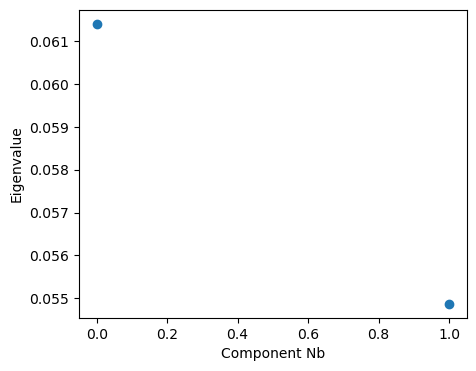

In [47]:

fig, ax = plt.subplots(1, figsize=(5, 4))
ax.scatter(range(gp.lambdas_.size), gp.lambdas_)
ax.set_xlabel('Component Nb')
ax.set_ylabel('Eigenvalue')

plt.show()